<a href="https://colab.research.google.com/github/sc7-cloud/TFG---GOOGLE-COLAB-C-DIGOS-/blob/main/ANALISIS_BASE_DE_DATOS_CANCIONES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

  Chartmetric ID         Artista Artista ID            País          Región  \
0        1404155      Lola Young       1001     Reino Unido  Western Europe   
1         470449   Playboi Carti       1002  Estados Unidos   North America   
2           2007            Akon       1003         Senegal  Western Africa   
3           3544  Ellie Goulding       1004     Reino Unido  Western Europe   
4        1202489          GIVĒON       1005  Estados Unidos   North America   

      Continente      Solista/Grupo     Género 1    Género 2   Género 3  ...  \
0         Europe              Grupo          R&B    Folk Pop      Indie  ...   
1  North America  Artistas solistas  Hip-Hop/Rap     Pop Rap   Rage Rap  ...   
2         Africa  Artistas solistas  Hip-Hop/Rap         Pop   R&B/Soul  ...   
3         Europe  Artistas solistas   Electronic  Electropop  Indie Pop  ...   
4  North America  Artistas solistas          R&B         Pop   Neo-Soul  ...   

  Me gusta en TikTok Tasa de Participación e

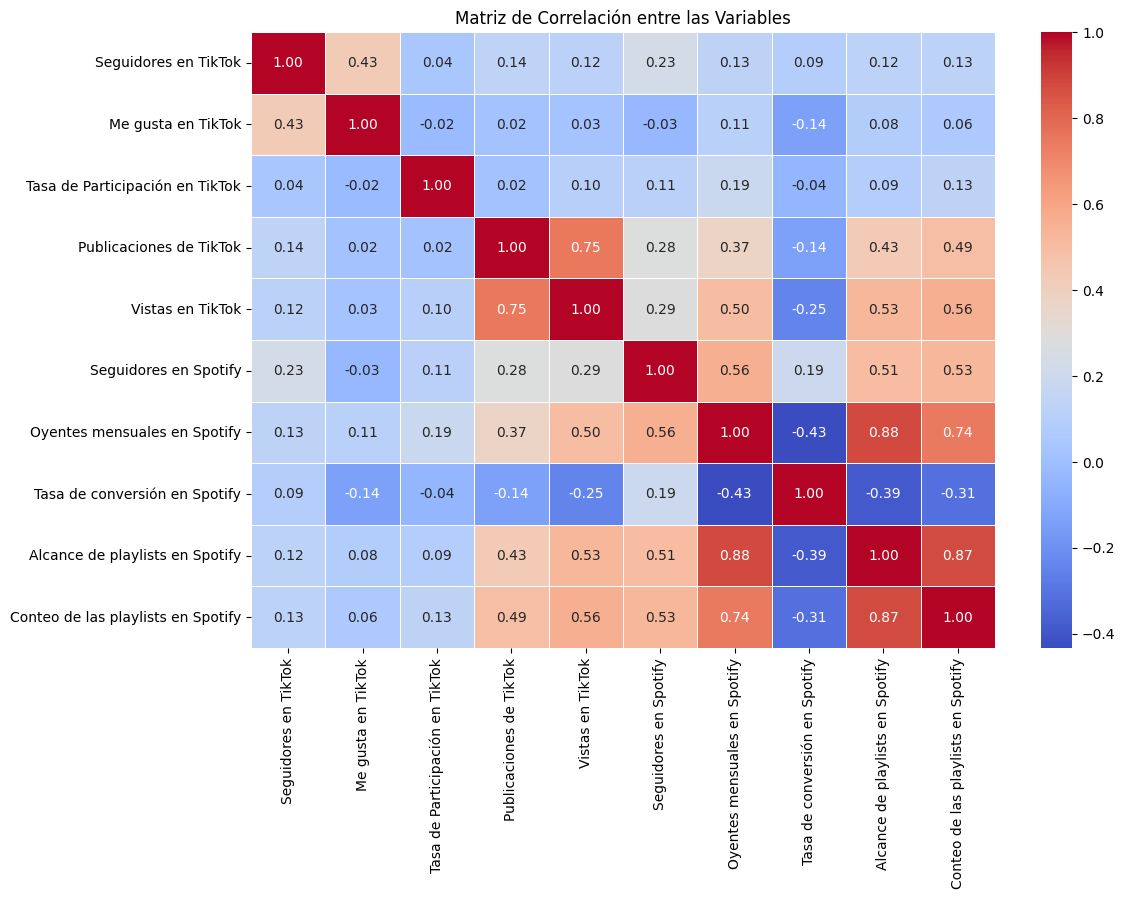

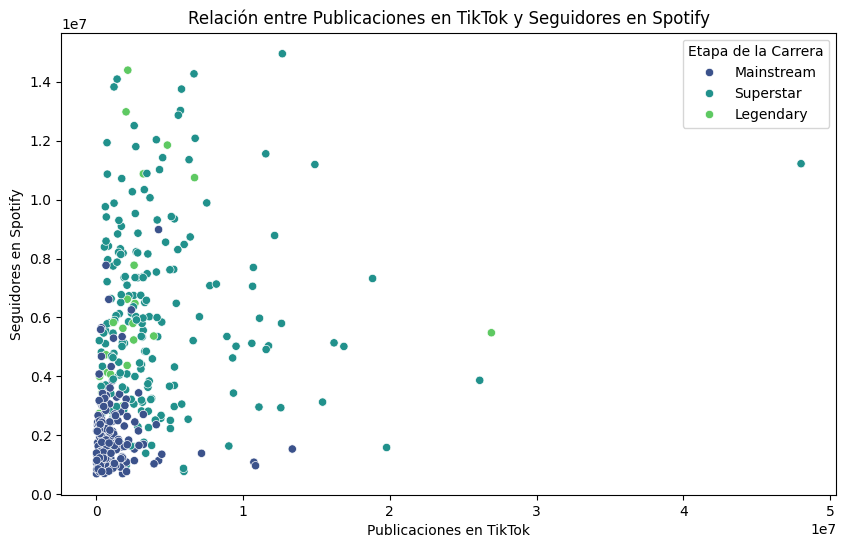


Correlación entre Seguidores en TikTok y Seguidores en Spotify: 0.23

Correlación entre Vistas en TikTok y Tasa de Conversión en Spotify: -0.25


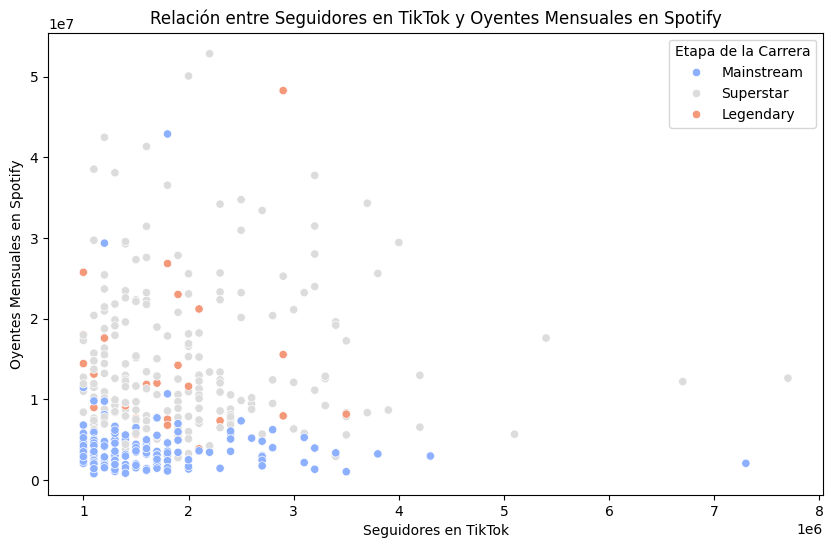


Promedio de Tasa de Conversión en Spotify por Etapa de la Carrera:
Etapa de la carrera
Legendary     0.502610
Mainstream    0.698993
Superstar     0.497011
Name: Tasa de conversión en Spotify, dtype: float64


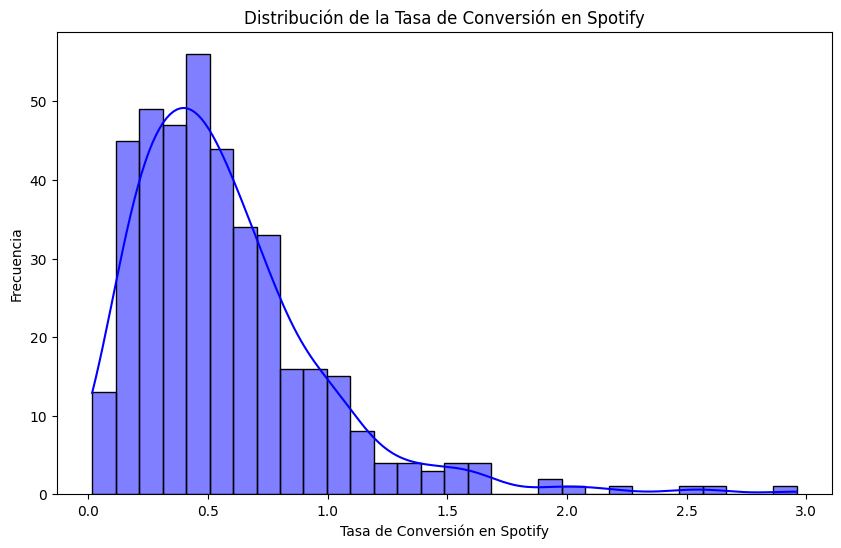


Número de outliers en Seguidores en Spotify: 10

Conclusión:
Este análisis permite entender cómo las métricas en TikTok influyen en las variables relacionadas con Spotify. Las correlaciones sugieren que, mientras que la presencia en TikTok puede tener un impacto directo en la visibilidad y éxito de los artistas, no todos los artistas siguen los mismos patrones, y las métricas de Spotify como seguidores y oyentes mensuales son indicativos del éxito global en la plataforma.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




df_artistas = pd.read_excel('/content/Artistas.xlsx')


df_artistas['Chartmetric ID'] = df_artistas['Chartmetric ID'].astype('category')
df_artistas['Artista ID'] = df_artistas['Artista ID'].astype('category')


print(df_artistas.head())


df_artistas_num = df_artistas.select_dtypes(include=[np.number])



print("\nResumen Estadístico:")
print(df_artistas_num.describe())



correlation_matrix = df_artistas_num.corr()


plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación entre las Variables')
plt.show()



plt.figure(figsize=(10, 6))
sns.scatterplot(x='Publicaciones de TikTok', y='Seguidores en Spotify', data=df_artistas, hue='Etapa de la carrera', palette='viridis')
plt.title('Relación entre Publicaciones en TikTok y Seguidores en Spotify')
plt.xlabel('Publicaciones en TikTok')
plt.ylabel('Seguidores en Spotify')
plt.legend(title='Etapa de la Carrera')
plt.show()



correlacion_tiktok_spotify = df_artistas['Seguidores en TikTok'].corr(df_artistas['Seguidores en Spotify'])
print(f"\nCorrelación entre Seguidores en TikTok y Seguidores en Spotify: {correlacion_tiktok_spotify:.2f}")



correlacion_vistas_tiktok_conversion = df_artistas['Vistas en TikTok'].corr(df_artistas['Tasa de conversión en Spotify'])
print(f"\nCorrelación entre Vistas en TikTok y Tasa de Conversión en Spotify: {correlacion_vistas_tiktok_conversion:.2f}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x='Seguidores en TikTok', y='Oyentes mensuales en Spotify', data=df_artistas, hue='Etapa de la carrera', palette='coolwarm')
plt.title('Relación entre Seguidores en TikTok y Oyentes Mensuales en Spotify')
plt.xlabel('Seguidores en TikTok')
plt.ylabel('Oyentes Mensuales en Spotify')
plt.legend(title='Etapa de la Carrera')
plt.show()



tasa_conversion_promedio = df_artistas.groupby('Etapa de la carrera')['Tasa de conversión en Spotify'].mean()
print("\nPromedio de Tasa de Conversión en Spotify por Etapa de la Carrera:")
print(tasa_conversion_promedio)


plt.figure(figsize=(10, 6))
sns.histplot(df_artistas['Tasa de conversión en Spotify'], bins=30, kde=True, color='blue')
plt.title('Distribución de la Tasa de Conversión en Spotify')
plt.xlabel('Tasa de Conversión en Spotify')
plt.ylabel('Frecuencia')
plt.show()



Q1 = df_artistas['Seguidores en Spotify'].quantile(0.25)
Q3 = df_artistas['Seguidores en Spotify'].quantile(0.75)
IQR = Q3 - Q1

outliers = df_artistas[(df_artistas['Seguidores en Spotify'] < (Q1 - 1.5 * IQR)) | (df_artistas['Seguidores en Spotify'] > (Q3 + 1.5 * IQR))]
print(f"\nNúmero de outliers en Seguidores en Spotify: {outliers.shape[0]}")



print("\nConclusión:")
print("Este análisis permite entender cómo las métricas en TikTok influyen en las variables relacionadas con Spotify. "
      "Las correlaciones sugieren que, mientras que la presencia en TikTok puede tener un impacto directo en la visibilidad "
      "y éxito de los artistas, no todos los artistas siguen los mismos patrones, y las métricas de Spotify como seguidores y oyentes "
      "mensuales son indicativos del éxito global en la plataforma.")



Comprobando valores cero o negativos antes de la transformación:
Seguidores en TikTok                  1.000000e+06
Me gusta en TikTok                    1.600000e+06
Tasa de Participación en TikTok       1.010000e-02
Publicaciones de TikTok               1.369900e+04
Vistas en TikTok                      1.697239e+07
Seguidores en Spotify                 7.017360e+05
Oyentes mensuales en Spotify          7.956110e+05
Tasa de conversión en Spotify         1.642300e-02
Alcance de playlists en Spotify       1.001335e+07
Conteo de las playlists en Spotify    1.378700e+04
dtype: float64

Comprobando valores cero o negativos después de la sustitución:
Seguidores en TikTok                  1.000000e+06
Me gusta en TikTok                    1.600000e+06
Tasa de Participación en TikTok       1.010000e-02
Publicaciones de TikTok               1.369900e+04
Vistas en TikTok                      1.697239e+07
Seguidores en Spotify                 7.017360e+05
Oyentes mensuales en Spotify          

<ipython-input-2-09cfdd3bb417>:15: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_artistas[columnas_tiktok_spotify] = df_artistas[columnas_tiktok_spotify].applymap(lambda x: 1 if x <= 0 else x)


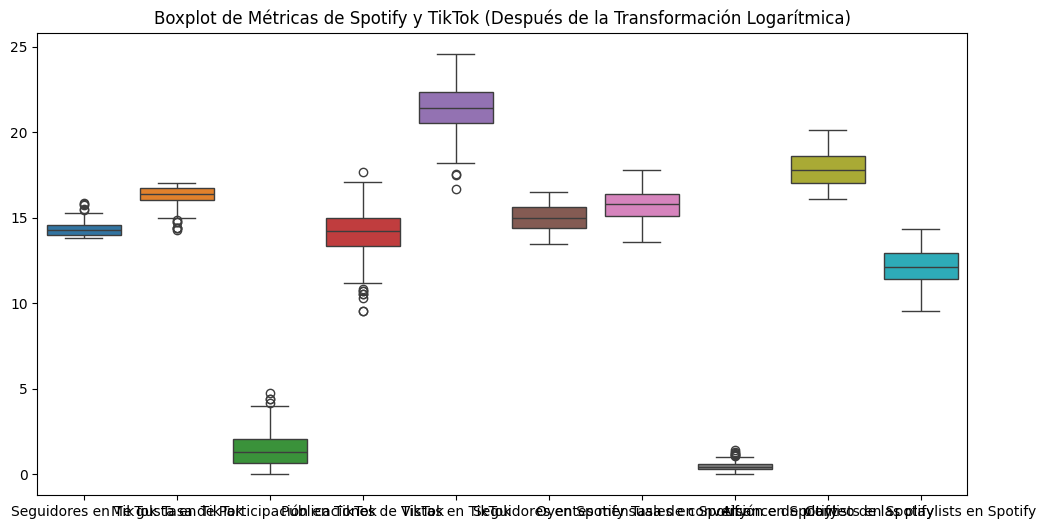

In [ ]:
import pandas as pd
import numpy as np



columnas_tiktok_spotify = ['Seguidores en TikTok', 'Me gusta en TikTok', 'Tasa de Participación en TikTok', 'Publicaciones de TikTok',
                           'Vistas en TikTok', 'Seguidores en Spotify', 'Oyentes mensuales en Spotify', 'Tasa de conversión en Spotify',
                           'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify']


print("\nComprobando valores cero o negativos antes de la transformación:")
print(df_artistas[columnas_tiktok_spotify].min())


df_artistas[columnas_tiktok_spotify] = df_artistas[columnas_tiktok_spotify].applymap(lambda x: 1 if x <= 0 else x)


print("\nComprobando valores cero o negativos después de la sustitución:")
print(df_artistas[columnas_tiktok_spotify].min())


df_artistas_log = df_artistas.copy()
df_artistas_log[columnas_tiktok_spotify] = np.log(df_artistas_log[columnas_tiktok_spotify] + 1)


print("\nResumen estadístico después de la transformación logarítmica:")
print(df_artistas_log[columnas_tiktok_spotify].describe())


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_artistas_log[columnas_tiktok_spotify])
plt.title('Boxplot de Métricas de Spotify y TikTok (Después de la Transformación Logarítmica)')
plt.show()


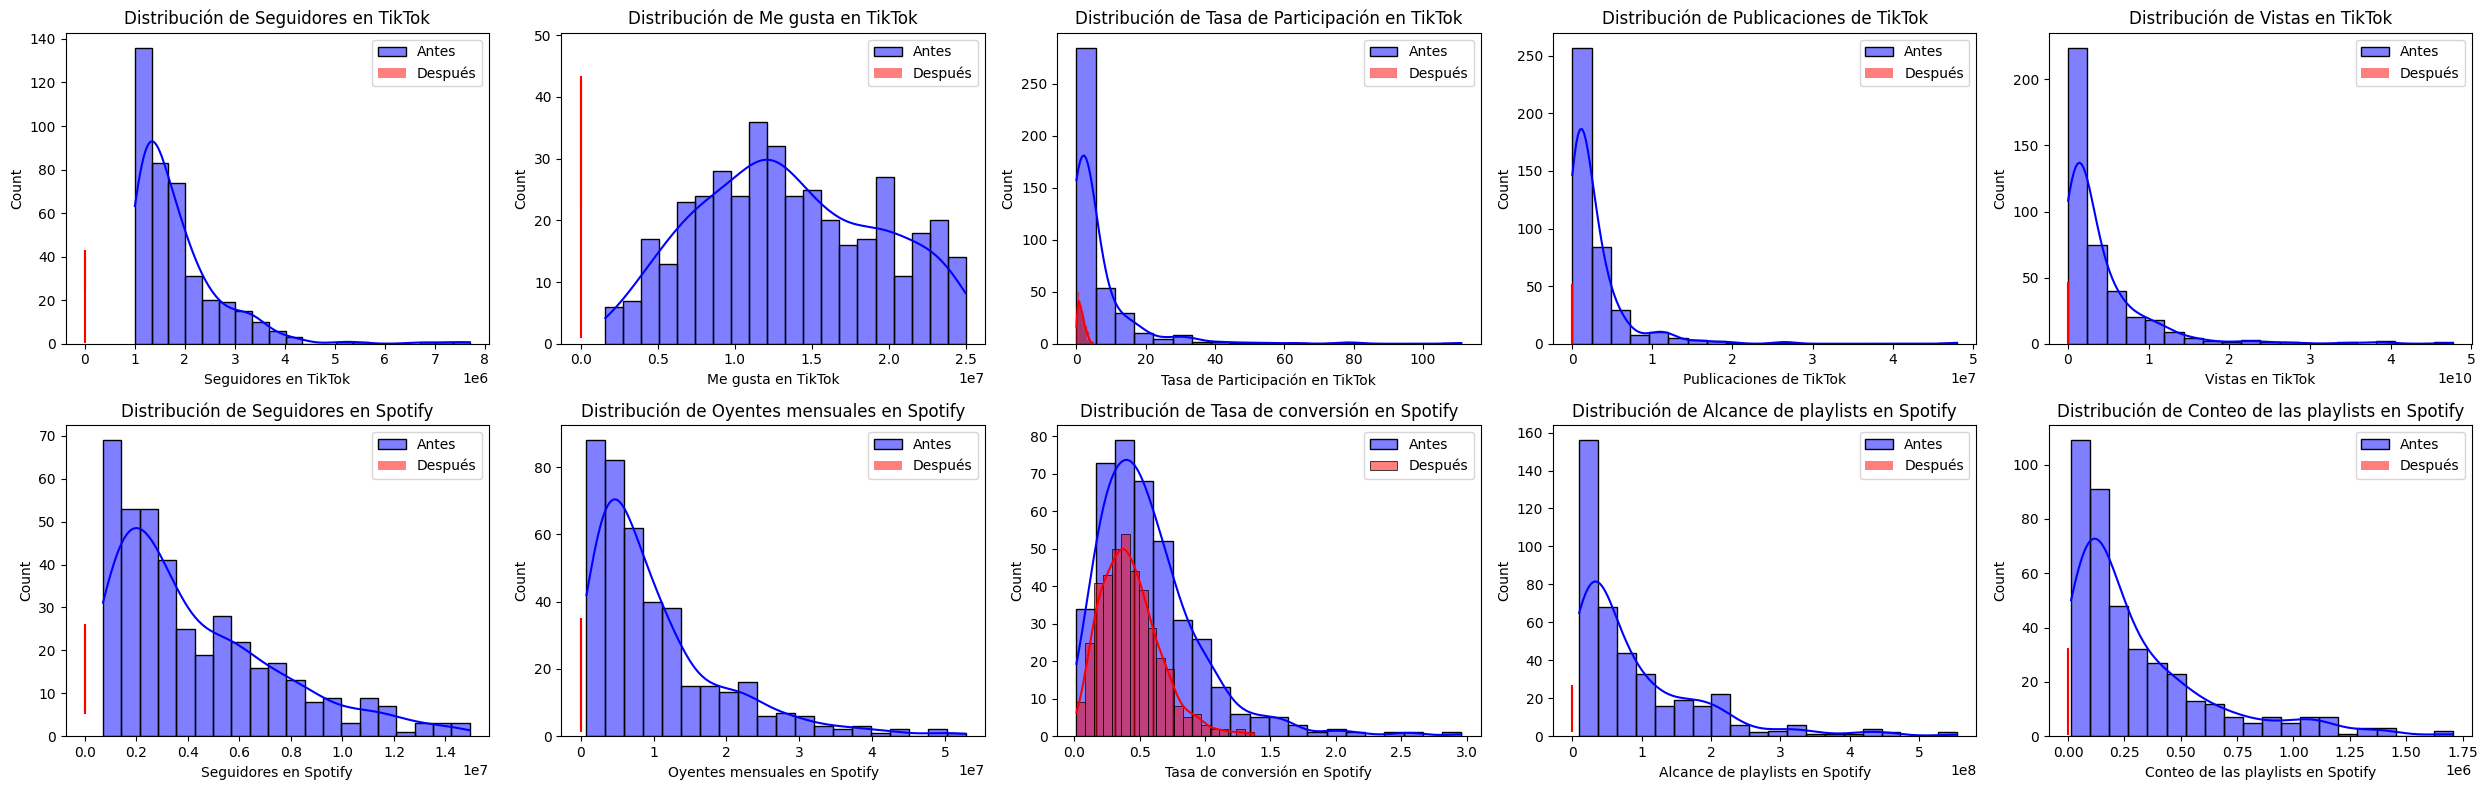

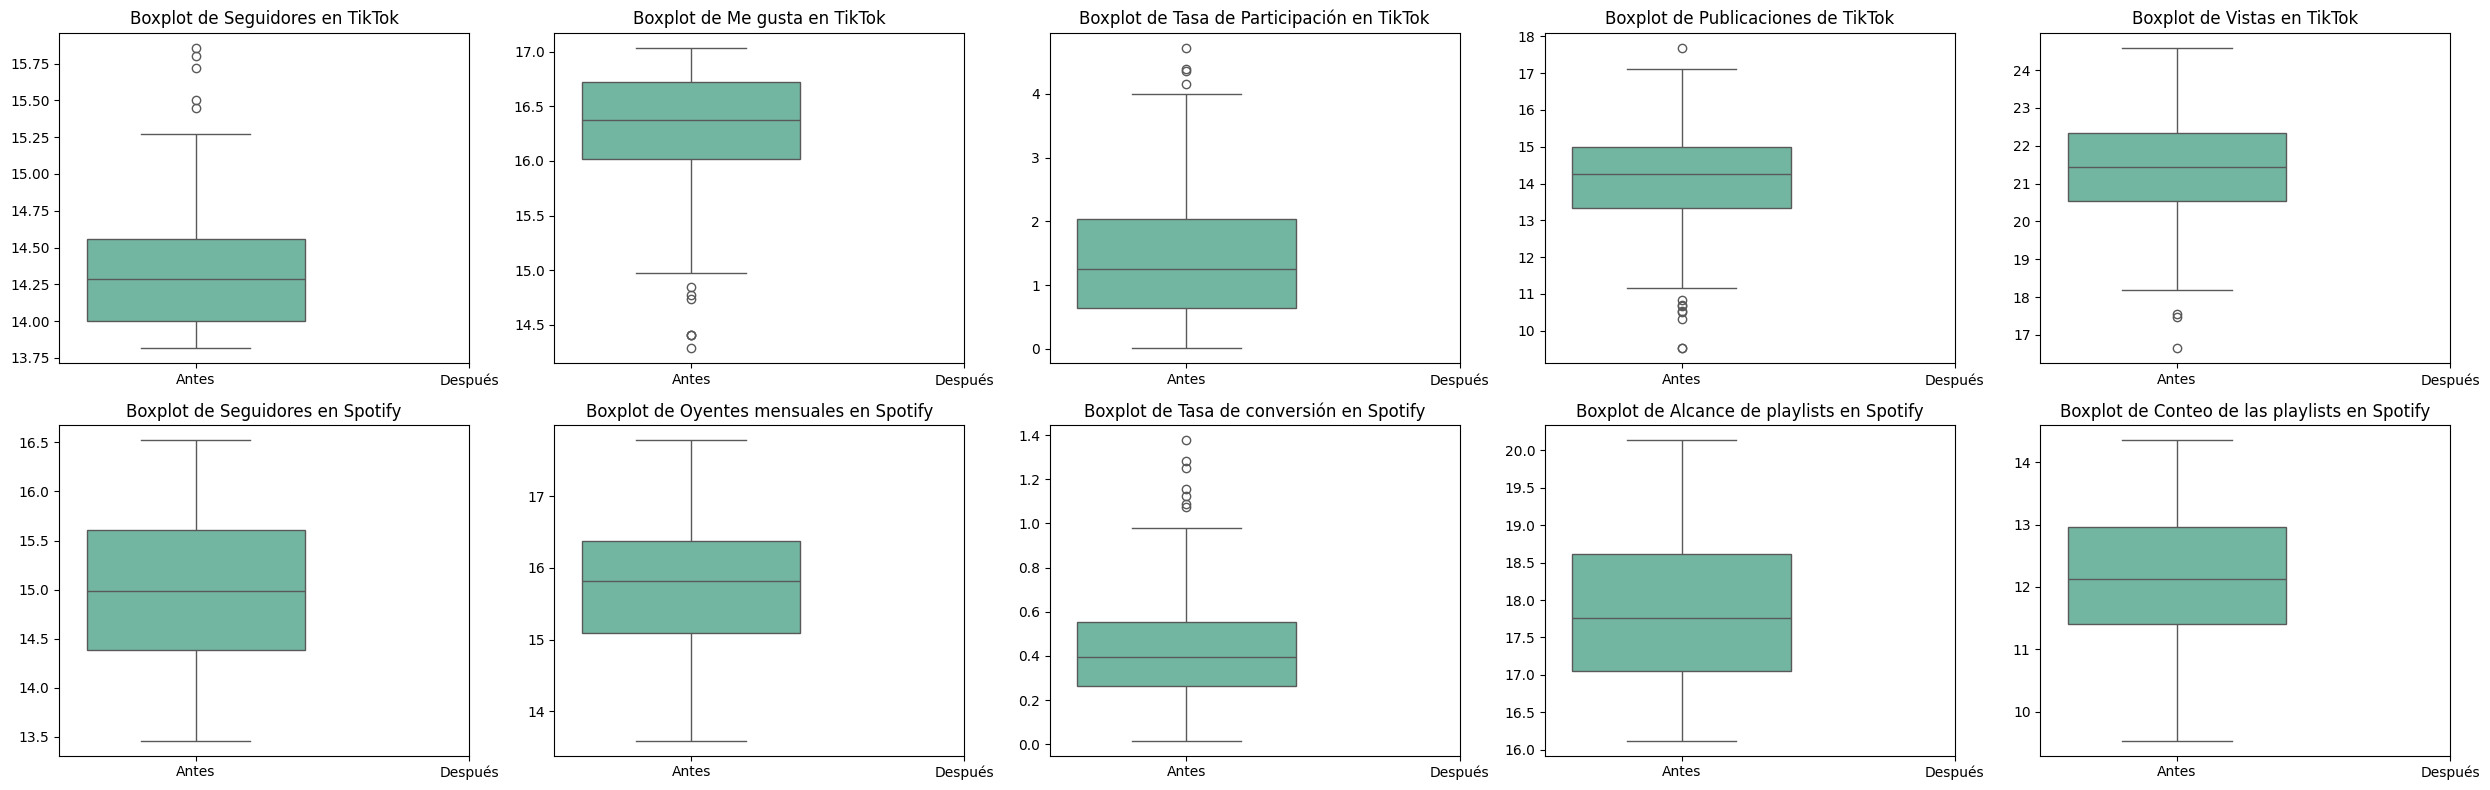

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




columnas_tiktok_spotify = ['Seguidores en TikTok', 'Me gusta en TikTok', 'Tasa de Participación en TikTok',
                           'Publicaciones de TikTok', 'Vistas en TikTok', 'Seguidores en Spotify',
                           'Oyentes mensuales en Spotify', 'Tasa de conversión en Spotify',
                           'Alcance de playlists en Spotify', 'Conteo de las playlists en Spotify']


plt.figure(figsize=(25, 8))
for i, columna in enumerate(columnas_tiktok_spotify, 1):
    plt.subplot(2, 5, i)
    sns.histplot(df_artistas[columna], kde=True, color="blue", label="Antes", bins=20)
    sns.histplot(df_artistas_log[columna], kde=True, color="red", label="Después", bins=20)
    plt.title(f'Distribución de {columna}')
    plt.legend()

plt.tight_layout()
plt.show()


plt.figure(figsize=(25, 8))
for i, columna in enumerate(columnas_tiktok_spotify, 1):
    plt.subplot(2, 5, i)
    sns.boxplot(data=[df_artistas[columna], df_artistas_log[columna]],
                palette="Set2")
    plt.title(f'Boxplot de {columna}')
    plt.xticks([0, 1], ['Antes', 'Después'])

plt.tight_layout()
plt.show()


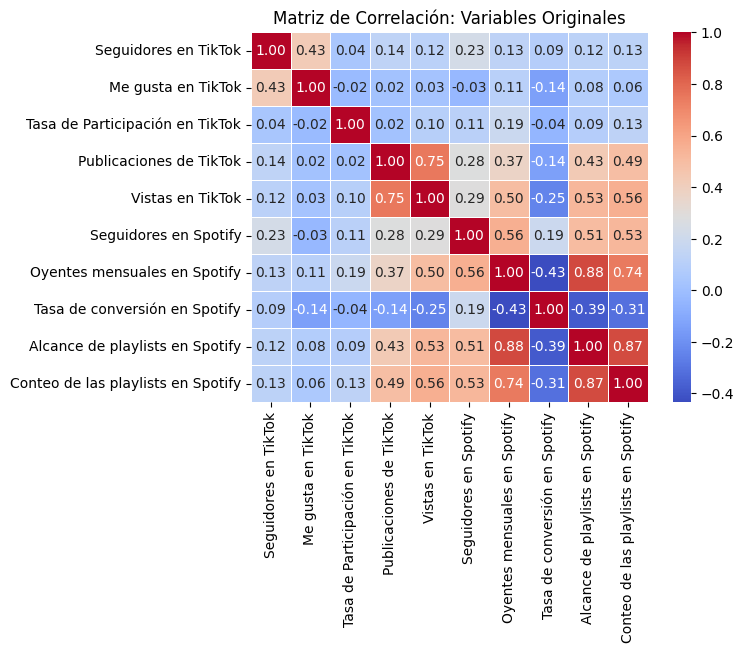

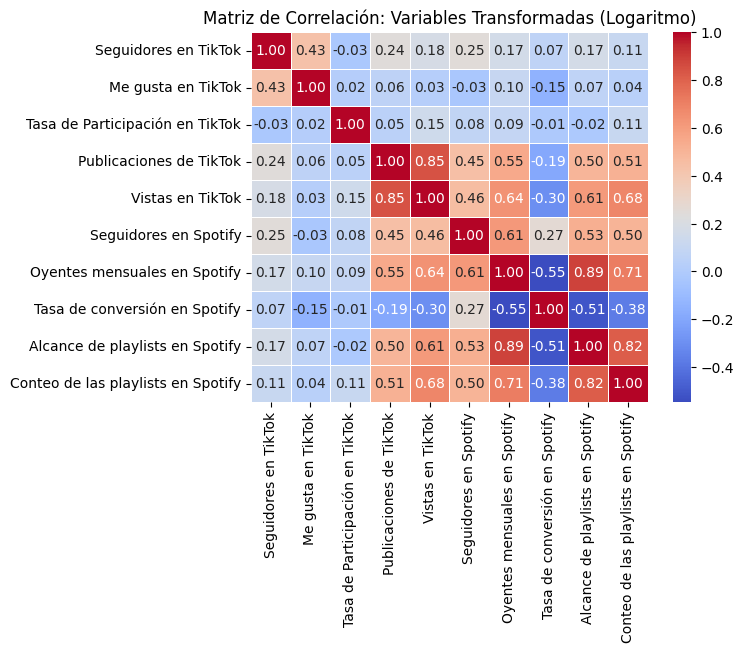

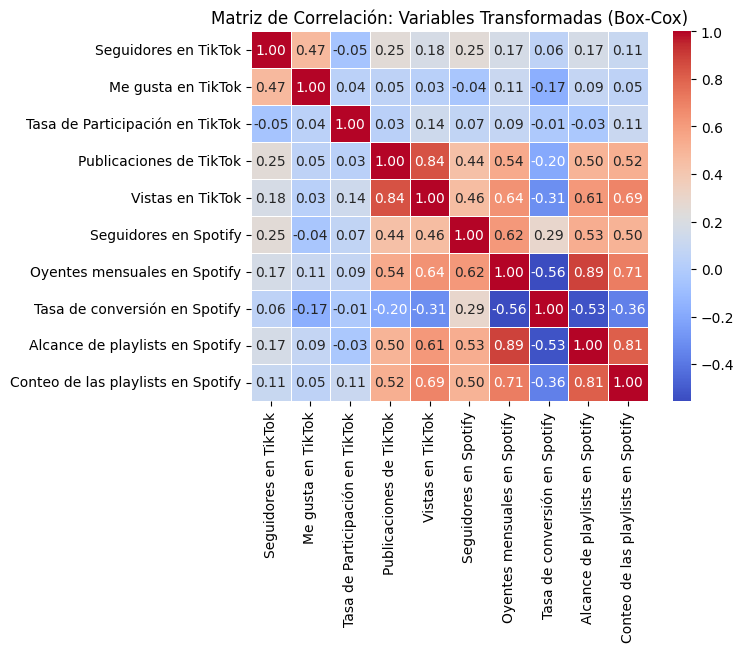


Correlación Original:
                                    Seguidores en TikTok  Me gusta en TikTok  \
Seguidores en TikTok                            1.000000            0.427179   
Me gusta en TikTok                              0.427179            1.000000   
Tasa de Participación en TikTok                 0.041732           -0.024613   
Publicaciones de TikTok                         0.137576            0.019136   
Vistas en TikTok                                0.115272            0.025050   
Seguidores en Spotify                           0.229821           -0.031671   
Oyentes mensuales en Spotify                    0.130832            0.107759   
Tasa de conversión en Spotify                   0.089980           -0.138028   
Alcance de playlists en Spotify                 0.122354            0.083752   
Conteo de las playlists en Spotify              0.125122            0.057732   

                                    Tasa de Participación en TikTok  \
Seguidores en TikTok     

In [ ]:

corr_original = df_artistas[columnas_tiktok_spotify].corr()
sns.heatmap(corr_original, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación: Variables Originales')
plt.show()



df_artistas_log = df_artistas.copy()
for columna in columnas_tiktok_spotify:
    df_artistas_log[columna] = np.log(df_artistas_log[columna] + 1)


corr_log = df_artistas_log[columnas_tiktok_spotify].corr()
sns.heatmap(corr_log, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación: Variables Transformadas (Logaritmo)')
plt.show()


corr_boxcox = df_artistas_log[columnas_tiktok_spotify].corr()
sns.heatmap(corr_boxcox, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title('Matriz de Correlación: Variables Transformadas (Box-Cox)')
plt.show()


print("\nCorrelación Original:")
print(corr_original)
print("\nCorrelación después de transformación Logarítmica:")
print(corr_log)
print("\nCorrelación después de transformación Box-Cox:")
print(corr_boxcox)


In [ ]:

print(df_artistas_log.isnull().sum())


Chartmetric ID                        0
Artista                               0
Artista ID                            0
País                                  0
Región                                0
Continente                            0
Solista/Grupo                         0
Género 1                              0
Género 2                              0
Género 3                              0
Etapa de la carrera                   0
Momentum Reciente                     0
Seguidores en TikTok                  0
Me gusta en TikTok                    0
Tasa de Participación en TikTok       0
Publicaciones de TikTok               0
Vistas en TikTok                      0
Seguidores en Spotify                 0
Oyentes mensuales en Spotify          0
Tasa de conversión en Spotify         0
Alcance de playlists en Spotify       0
Conteo de las playlists en Spotify    0
Enlace de Spotify                     0
dtype: int64


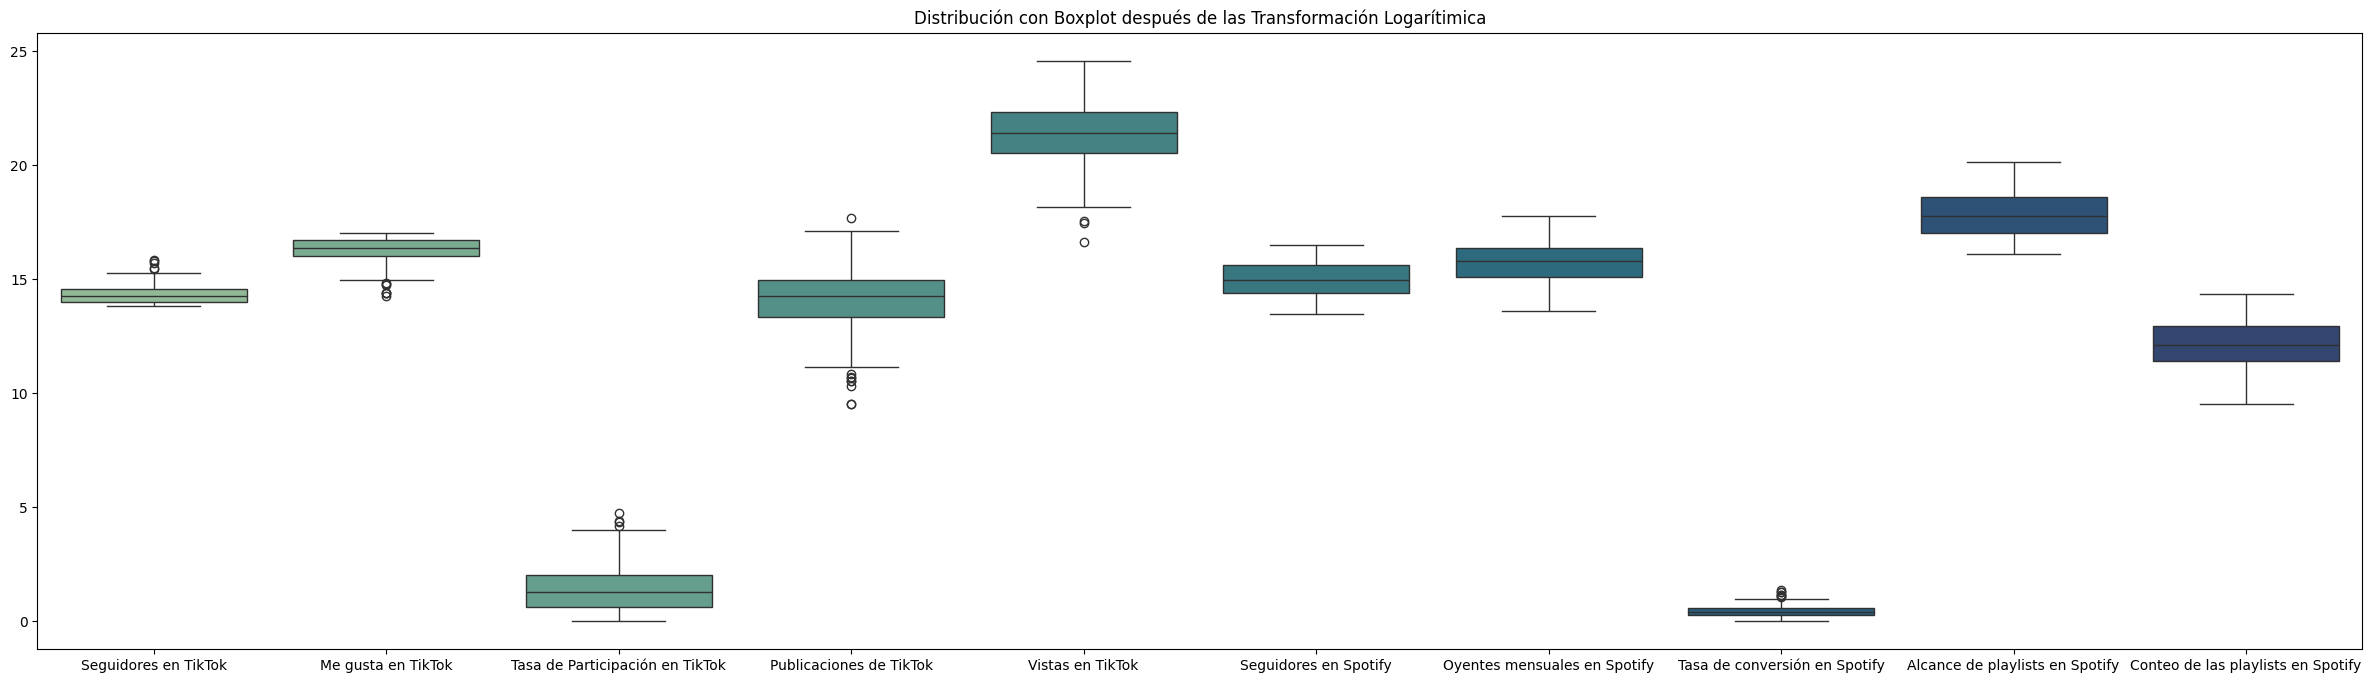

In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(30, 8))
sns.boxplot(data=df_artistas_log, palette="crest")
plt.title('Distribución con Boxplot después de las Transformación Logarítimica')
plt.show()


In [ ]:

if (df_artistas_boxcox < 0).sum().sum() > 0:
    print("Se han encontrado valores negativos.")
else:
    print("No hay valores negativos.")


TypeError: Unordered Categoricals can only compare equality or not

In [ ]:
import pandas as pd


df_artistas_log_summary = df_artistas_log.describe()


df_artistas_log_summary



,Seguidores en TikTok,Me gusta en TikTok,Tasa de Participación en TikTok,Publicaciones de TikTok,Vistas en TikTok,Seguidores en Spotify,Oyentes mensuales en Spotify,Tasa de conversión en Spotify,Alcance de playlists en Spotify,Conteo de las playlists en Spotify
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000
mean,14.340579,16.307880,1.424917,14.112191,21.384922,15.002134,15.782266,0.428653,17.843843,12.169133
std,0.388065,0.523984,0.965942,1.309096,1.273730,0.766344,0.870175,0.225807,0.977706,1.007222
min,13.815512,14.285515,0.010049,9.525151,16.647099,13.461314,13.586867,0.016290,16.119430,9.531554
25%,13.997833,16.015498,0.634153,13.330251,20.550055,14.386613,15.094340,0.262305,17.045297,11.407796
50%,14.285515,16.372738,1.255853,14.246336,21.435330,14.985573,15.814366,0.397009,17.766006,12.121829
75%,14.557448,16.721042,2.032312,14.982299,22.326417,15.610448,16.378036,0.554216,18.614538,12.954252
max,15.856731,17.034386,4.718785,17.687144,24.588687,16.519855,17.782845,1.376182,20.133696,14.350090


from matplotlib import pyplot as plt
df_artistas_log_summary['Seguidores en TikTok'].plot(kind='hist', bins=20, title='Seguidores en TikTok')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary['Me gusta en TikTok'].plot(kind='hist', bins=20, title='Me gusta en TikTok')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary['Tasa de Participación en TikTok'].plot(kind='hist', bins=20, title='Tasa de Participación en TikTok')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary['Publicaciones de TikTok'].plot(kind='hist', bins=20, title='Publicaciones de TikTok')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary.plot(kind='scatter', x='Seguidores en TikTok', y='Me gusta en TikTok', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary.plot(kind='scatter', x='Me gusta en TikTok', y='Tasa de Participación en TikTok', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary.plot(kind='scatter', x='Tasa de Participación en TikTok', y='Publicaciones de TikTok', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary.plot(kind='scatter', x='Publicaciones de TikTok', y='Vistas en TikTok', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary['Seguidores en TikTok'].plot(kind='line', figsize=(8, 4), title='Seguidores en TikTok')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary['Me gusta en TikTok'].plot(kind='line', figsize=(8, 4), title='Me gusta en TikTok')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary['Tasa de Participación en TikTok'].plot(kind='line', figsize=(8, 4), title='Tasa de Participación en TikTok')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
df_artistas_log_summary['Publicaciones de TikTok'].plot(kind='line', figsize=(8, 4), title='Publicaciones de TikTok')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:

constant_columns = df_artistas_boxcox.columns[df_artistas_boxcox.nunique() == 1]
print(f"Columnas con valores constantes: {constant_columns}")


Columnas con valores constantes: Index([], dtype='object')


In [ ]:

comparison = pd.DataFrame({
    'Original': df_artistas['Seguidores en Spotify'],
    'Log Transformado': df_artistas_log['Seguidores en Spotify']
})
print(comparison.head())


   Original  Log Transformado
0    704502         13.465248
1  13020064         16.382002
2   5355925         15.493714
3  12859303         16.369578
4   4321836         15.279191
